Задание лабораторной работы основано на материалах домашнего задания по курсу от DeepSchool 3DCV

https://deepschool.ru/3dcv

### Установка пакетов

Начнем с установки необходимых пакетов python. Ничего необычного не понадобится - обычные numpy, cv2, matplotlib

In [ ]:
!pip install numpy
!pip install opencv-python
!pip install matplotlib

Теперь можно импортировать

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
def load_image(path: str) -> np.ndarray:
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

### Гомография

Используя полученные на занятии новые знания, сделаем простейший выравниватель документов. Для начала нам нужна фотография документа, который мы будем выравнивать. Сделайте фотографию самостоятельно или найдите пример в интернете.

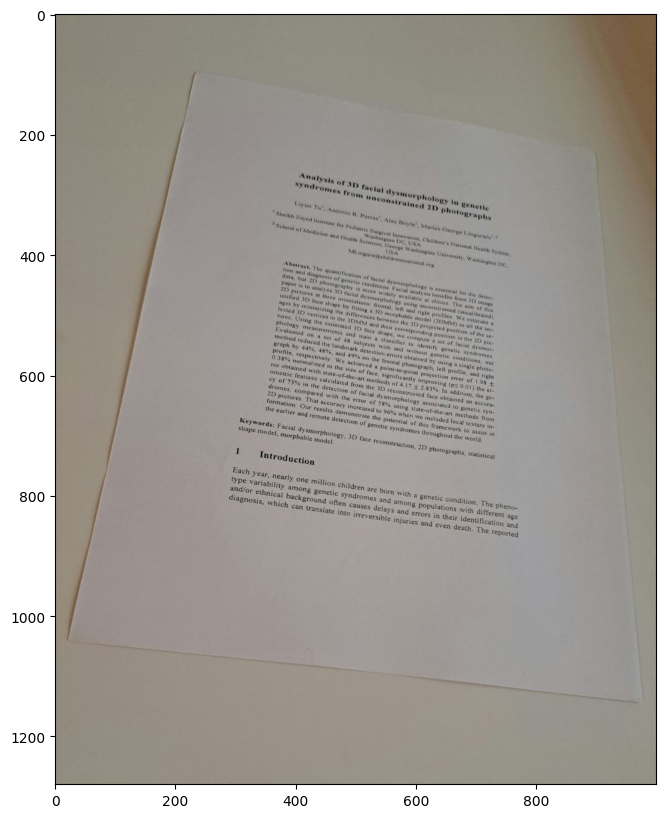

In [3]:
image = load_image("document.jpg")
plt.imshow(image)
plt.show()

Для начала нам нужно определить углы документа. Их можно найти автоматически, но предлагаем не отвлекаться на эту задачу. Поэтому сделаем это просто руками. Отсчет ведем от левого верхнего угла и по часовой стрелке

In [ ]:
pts_src = np.array([[234, 96], [896, 228], [977, 1145], [20, 1040]])

Далее нужно определить, в какие точки мы будем отображать эти углы - сделайте это самостоятельно. Предполагается, что в итоге мы хотим увидеть прямоугольник

In [ ]:
pts_dst = np.array( ... ) # Определите желаемое положение для каждого угла

Теперь мы можем найти гомографию по четырем соответствиям между точками. Вам предлагается сделать это двумя способами - базово, с использованием OpenCV метода (пример можно найти [здесь](https://learnopencv.com/homography-examples-using-opencv-python-c/)) и продвинуто, с помощью самописной функции DLT. Можно легко найти уже написанные функции поиска гомографии с помощью DLT, поэтому снабжайте код пояснениями, чтобы было понятно, что вы разобрались, что происходит в коде.

In [ ]:
def find_homography_opencv(src_pts: np.ndarray, dst_pts: np.ndarray) -> np.ndarray:
    # Реализуйте вычисление гомографии с помощью OpenCV

# Дополнительное задание
def find_homography_custom(src_pts: np.ndarray, dst_pts: np.ndarray) -> np.ndarray:
    # Реализуйте вычисление гомографии с помощью самописного метода

In [ ]:
H = find_homography_opencv(pts_src, pts_dst)

Зная гомографию, мы можем применить ее к изображению. Опять же, предлагается начать с готового метода из OpenCV (снова предлагается [этот](https://learnopencv.com/homography-examples-using-opencv-python-c/) пример). После этого можно попробовать написать кастомное преобразование изображения с помощью гомографии.

In [ ]:
def warp_perspective_opencv(image: np.ndarray, H: np.ndarray, dsize: np.ndarray) -> np.ndarray:
    # Реализуйте преобразование изображения с помощью OpenCV. Вам понадобятся
    # image - изначальное изображение
    # H - гомография
    # dsize - размер конечного изображения

# Дополнительное задание
def warp_perspective_custom(image: np.ndarray, H: np.ndarray, dsize: np.ndarray) -> np.ndarray:
    # Реализуйте кастомное преобразование изображения. Вам понадобятся
    # image - изначальное изображение
    # H - гомография
    # dsize - размер конечного изображения

In [ ]:
dsize = ... # размеры нового изображения
im_out = warp_perspective_opencv(image, H, dsize)
plt.imshow(im_src)
plt.show()

### Калибровка

В данном разделе вам предлагается сделать калибровку камеры своего мобильного телефона. Как мы выяснили на занятии, для этого необходима калибровочная доска. Идеальным вариантом будет вывод шахматной доски на экран компьютера, так как он является настолько плоским, насколько это возможно в быту.
Генераторов досок в интернете предостаточно, откройте, например, [этот](https://markhedleyjones.com/projects/calibration-checkerboard-collection). Далее произведите серию снимков с телефона.

Общие рекомендации:
* Делайте побольше снимков. На практике часто снимают видео, но это на ваше усмотрение. Зависит от желания заморачиваться с распаковкой кадров и прореживанием их.
* Постарайтесь захватить максимум ракурсов: ближе/дальше, выбирайте разные углы наклона, вращайте камеру, постарайтесь захватить всё поле зрение камеры.
* На каждом снимке должна быть видна вся доска.

Далее проделайте калибровку с помощью стандартных методов OpenCV, пример можно найти [здесь](https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html) или в миллионе других мест.

Попробуйте убрать дисторсию с помощью функции undistort. Стало ли лучше? Если стало только хуже, обратитесь к рекомендациям по съёмке для калибровки снова.

### 2D/3D Преобразования

Представим, что у вас есть автомобиль, к крыше которого прикреплена RGBD камера. Такая камера снимает как обычная, но четвертым каналом она передает глубину объекта. Глубина объекта - это координаты Z объекта в системе координат камеры. Наша задача - научиться строить 3D карту по данным с сенсоров этого автомобиля.

Вам дано изображение с этой камеры в какой-то момент времени

In [4]:
def load_image(path: str) -> np.ndarray:
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

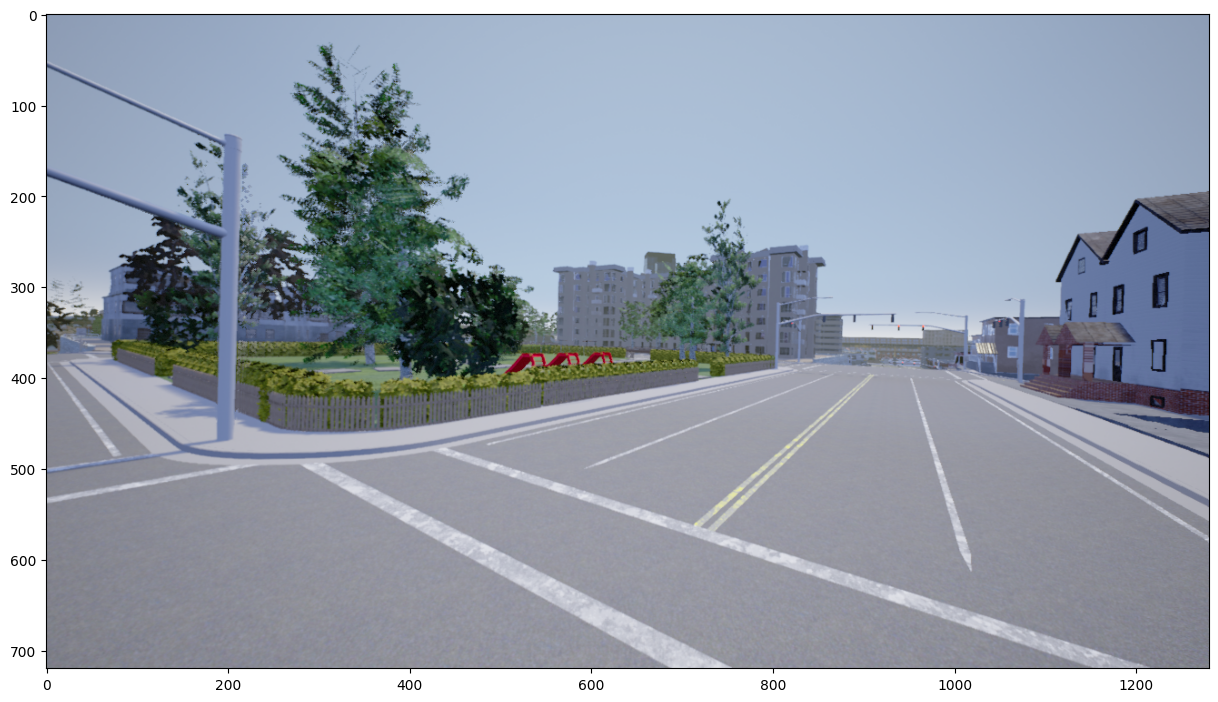

In [5]:
image1 = load_image("image1.png")
plt.imshow(image1)
plt.show()

А также соответствующая ей карта глубины

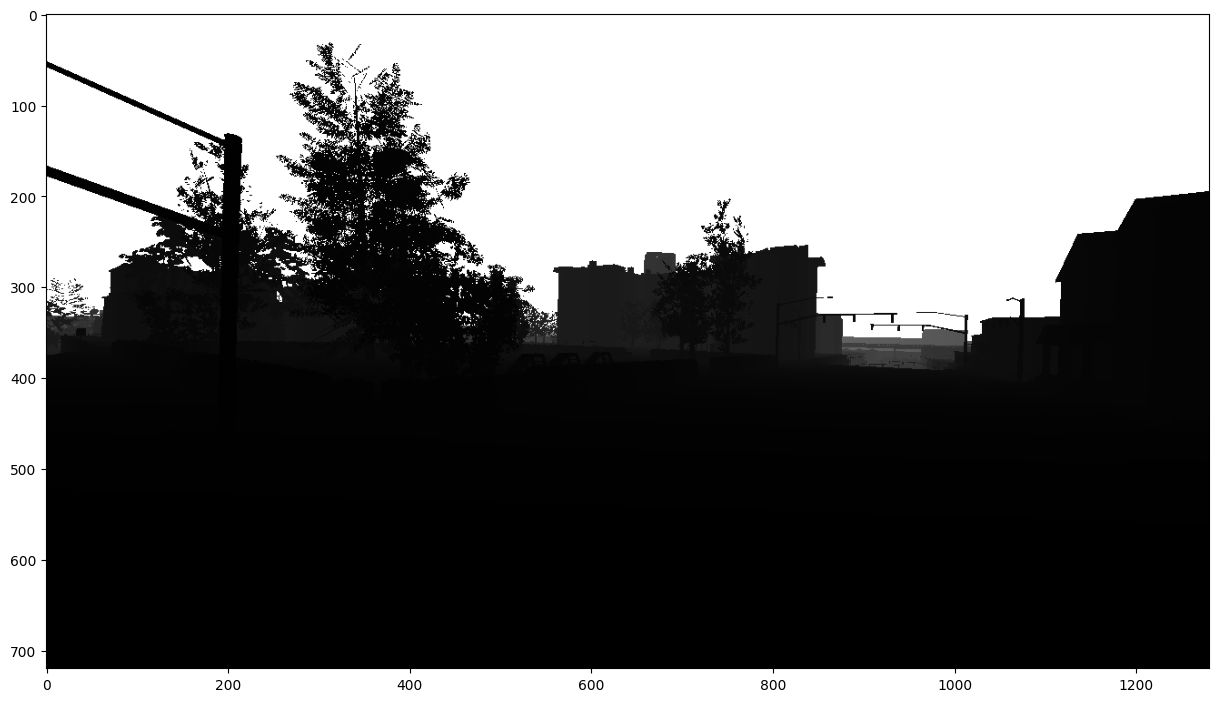

In [6]:
# Глубины даны нормализованными, от 0 до 1, что соответствует расстоянию от 0 до 1000м,
# поэтому здесь мы умножаем на 1000
depth1 = np.load("depth1.npy") * 1000
plt.imshow(depth1, cmap='gray')
plt.show()

Предположим, что мы заранее откалибровали наши камеры (либо калибровка указана в спецификации камеры). Вот эти данные

In [ ]:
fx = 448.1551643293023
fy = 448.1551643293023
px = 640.0
py = 360.0

Составьте из этих данных матрицу камеры (формулу можно найти в слайдах)

In [ ]:
K = np.array(...) # TODO: заполните матрицу камеры

Также далее нам пригодится обратная матрица для матрицы камеры (можно найти ее численно, но советуем воспользоваться аналитической формулой, она есть в слайдах про обратную проекцию)

In [ ]:
K_inv = np.array(...) # TODO: заполните обратную матрицу камеры

Итак, у нас все готово для построения 3D карты из данных первого изображения.
Для этого нам нужна формула обратной проекции (см. презентацию).
Давайте присмотримся повнимательнее к этой формуле.
u, v - это координаты пикселя. Мы хотим построить карту из всех пикселей, поэтому нам нужно пробежаться по всем их значениям. Чтобы векторизовать дальнейшие вычисления, будем записывать все по возможности в матрицах.
points_2d - матрица, в которой 2 строки (u и v), и w * h столбцов, где w и h - размеры изображения. То есть, эта матрица будет выглядеть примерно так

| 0 | 1 | 2 | ... | w-1 | 0 | 1 | ... | w-1 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | 0 | 0 | ... | 0 | 1 | 1 | ... | h-1 |

In [ ]:
points_2d = np.array(...) # TODO: заполните матрицу с координатами пикселей

Отлично, следующий шаг - перейти к однородным координатам. Здесь это просто - добавьте единицу в качестве третьей координаты для каждого пикселя

In [ ]:
points_2d_h = ... # TODO: переведите points_2d в однородные координаты

Самое время перейти к обратной проекции. Еще раз взгляните на формулу со слайда с обратной проекцией - что нужно сделать, чтобы из пикселя в однородных координатах получить луч в однородных координатах?

In [ ]:
rays = ... @ points_2d_h # TODO: восстановите формулу для получения матрицы с лучами

Теперь перейдем к последнему этапу формулы со слайда с обратной проекцией - применение глубины. Используйте ранее загруженную карту глубины

In [ ]:
cloud1 = rays * ... # TODO: преобразуйте лучи и глубины в 3D точки

3D точки готовы! Чтобы 3D была красивая, нам также нужны цвета - вытащите их из изображения аналогично points_2d. Там мы добавляли в столбцы координаты пикселей, а здесь так же постройте матрицу, в которой в столбцах будут соответствующие цвета

In [ ]:
colors1 = ... # TODO: постройте матрицу с цветами пикселей в столбцах

Самый простой способ открыть, покрутить и даже обработать облако точек - использовать [CloudCompare](https://www.cloudcompare.org/release/). Просто запустите ячейку снизу и закиньте полученный файл в CC.

In [ ]:
def save_point_cloud(cloud: np.ndarray, colors: np.ndarray, file_name: str) -> None:
    file = open(file_name, "w")
    for i in range(cloud1.shape[1]):
        file.write(f'{cloud[0, i]}, {cloud[1, i]}, {cloud[2, i]}, {colors[0, i]}, {colors[1, i]}, {colors[2, i]}\n')

In [ ]:
save_point_cloud(cloud1, colors1, "cloud1.xyz")

Уже почти то, что мы хотели получить. Но карту портят далекие точки - небо находится бесконечно далеко, в карте глубины максимальная глубина была 1000м. Отфильтруйте облако и снова откройте в CC

In [ ]:
cloud1_filtered = ... # Отфильтруйте слишком далекие точки
colors1_filtered = ... # Не забудьте, что цветов тоже стало меньше

In [ ]:
save_point_cloud(cloud1_filtered, colors1_filtered, "cloud1_filtered.xyz")

Итак, мы получили данные с сенсоров и построили небольшую локальную 3D карту.